In [2]:
import pandas as pd
import sqlite3
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
yearly_topics = [
    [
        "Action needed",
        "Legal action",
        "Men's actions",
        "Advocacy & campaigning",
        "Government inaction",
        "Violence justified",
        "Services",
        "Abuse experiences",
        "Social causes",
        "Culture of violence"
    ],
    [
        "Culture & attitudes",
        "Government inaction",
        "Services needed",
        "Men's actions",
        "Advocacy & campaigning",
        "Policing",
        "Prevalence"
    ],
    [
        "Violence & policing",
        "Male perpetrators",
        "Government inaction",
        "Community support",
        "Law reform",
        "Successful programs",
        "Social determinants",
        "Victims' experiences"
    ],
    [
        "Social context",
        "Male perpetrators",
        "Survival & inspiration",
        "Prevalence & risk",
        "Programs & services",
        "Men as victims"
    ],
    [
        "Gun violence",
        "Prevalence",
        "Men's actions",
        "Contexts & causes",
        "Prevention strategy",
        "Government inaction",
        "Abuse experiences",
        "Advocacy & campaigning",
        "Politics & governance"
    ]
]

start_year = 2014
end_year = 2018
num_years = end_year-start_year+1

In [4]:
file_paths = [
    'input/2014/data/2014_10_clusters.xlsx',
    'input/2015/data/2015_7_clusters.xlsx',
    'input/2016/data/2016_8_clusters.xlsx',
    'input/2017/data/2017_6_clusters.xlsx',
    'input/2018/data/2018_9_clusters.xlsx'
]

In [160]:
import numpy as np

df = []
for i, path in enumerate(file_paths):
    df_tmp = pd.read_excel(path, 'topic_rank')
    df_tmp.set_index('Dominant_Topic_Num', inplace=True)
    df_tmp.index.name = 'idx'
    df_tmp['Topic'] = yearly_topics[i]
    df_tmp.sort_index(inplace=True)
    total = np.log2(df_tmp['Num_Documents'].sum())
    df_tmp['Log'] = list(map(lambda s: float(s.replace('%',''))/100*total, df_tmp['Perc_Documents']))
    df.append(df_tmp)
    
df[num_years-1]

,Topic_Keywords,Num_Documents,Perc_Documents,Topic,Log
idx,,,,,
1,"year, kill, murder, stop, death, happen, gun, ...",3089,13.8%,Gun violence,1.994125
2,"woman, men, report, problem, increase, link, r...",2823,12.61%,Prevalence,1.822168
3,"victim, police, man, partner, court, week, mal...",2748,12.28%,Men's actions,1.774482
4,"people, home, good, kid, violent, live, feel, ...",2348,10.49%,Government inaction,1.515824
5,"#domesticviolence, read, community, victoria, ...",2530,11.3%,Contexts & causes,1.632870
6,"support, service, fund, woman, program, house,...",2339,10.45%,Abuse experiences,1.510044
7,"woman, child, abuse, experience, relationship,...",2116,9.45%,Advocacy & campaigning,1.365542
8,"work, leave, survivor, great, story, end, comm...",2386,10.66%,Prevention strategy,1.540389
9,"issue, call, change, #auspol, law, perpetrator...",2005,8.96%,Politics & governance,1.294736


In [6]:
topics = set()
freqs = {}

for one_df in df:
    for topic in one_df['Topic']:
        freqs[topic] = freqs.get(topic, 0) + 1
        if topic not in topics:
            topics.add(topic)

for t in reversed(sorted(freqs, key=freqs.get)):
    print(t, freqs[t])

Government inaction 4
Advocacy & campaigning 3
Men's actions 3
Male perpetrators 2
Prevalence 2
Abuse experiences 2
Politics & governance 1
Prevention strategy 1
Contexts & causes 1
Gun violence 1
Men as victims 1
Prevalence & risk 1
Programs & services 1
Survival & inspiration 1
Social context 1
Victims' experiences 1
Successful programs 1
Social determinants 1
Law reform 1
Community support 1
Violence & policing 1
Policing 1
Services needed 1
Culture & attitudes 1
Social causes 1
Culture of violence 1
Services 1
Violence justified 1
Action needed 1
Legal action 1


In [111]:
import colorlover as cl
from IPython.display import HTML

In [177]:
import random

colors = cl.scales['12']['qual']['Set3'][3:]

# reds = cl.interp( cl.scales['3']['seq']['Reds'], 30)
greys = cl.scales['3']['seq']['Greys']
# others = cl.interp(cl.scales['3']['seq']['Greens']+cl.scales['3']['seq']['Blues'] + cl.scales['3']['seq']['Purples']+cl.scales['3']['seq']['YlGnBu']+cl.scales['10']['div']['BrBG']+greys+cl.scales['11']['div']['RdGy'][5:], 120 )

# colors.extend(reversed(reds[0:30:5]))
# random.shuffle(others)
# colors.extend(others[:24])

HTML(cl.to_html( colors ))

# Plot all topics

In [13]:
import numpy as np

traces = []

for i, topic in enumerate(reversed(sorted(freqs, key=freqs.get))):
        
        y = []
        text = []
        for one_df in df:
            found = False
            for _, row in one_df.iterrows():
                if row['Topic'] == topic:
                    found = True
                    if i <= 5:
                        text.append(str(i+1))
                    else:
                        text.append(None)
                    y.append(row['Perc_Documents'])
            
            if not found:
                y.append(0)
                text.append(None)
        
        if i <= 5:
            name = topic+' ('+str(i+1)+')'
        else:
            name = topic
            
        traces.append(go.Bar(
            x=list(range(start_year, end_year+1)),
            y=y,
            name=name,
            hoverinfo='none',
            text=text,
            textposition='inside',
            showlegend=True,
            marker=dict(
                color=colors[i]
            )
        ))
                
layout = go.Layout(
    barmode='stack',
    bargap=0,
    plot_bgcolor=greys[0],
    width=650,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~qjtjjt/0 or inside your plot.ly account where it is named 'stacked-bar'


# Chord

In [97]:
weights = {
    'Causes': 26/264,
    'Perpetrator': 32/264,
    'Solutions': 28/264,
    'System': 87/264,
    'Victim': 91/264
}

In [23]:
mapping = {
    'Government inaction': 'System',
    'Advocacy & campaigning': 'Solutions',
    "Men's actions": 'Perpetrator',
    'Male perpetrators': 'Perpetrator',
    'Prevalence': 'Causes',
    'Abuse experiences': 'Victim',
    'Politics & governance': 'System',
    'Prevention strategy': 'Solutions',
    'Contexts & causes': 'Causes',
    'Gun violence': 'Causes',
    'Men as victims': 'Victim',
    'Prevalence & risk': 'Causes',
    'Programs & services': 'System',
    'Survival & inspiration': 'Victim',
    'Social context': 'Causes',
    "Victims' experiences": 'Victim',
    "Successful programs": 'Solutions',
    'Social determinants': 'Causes',
    'Law reform': 'System',
    'Community support': 'Solutions',
    'Violence & policing': 'System',
    'Policing': 'System',
    'Services needed': 'Solutions',
    'Culture & attitudes': 'Causes',
    'Social causes': 'Causes',
    'Culture of violence': 'Causes',
    'Services': 'Solutions',
    'Violence justified': 'Causes',
    'Action needed': 'Solutions',
    'Legal action': 'System'
}

In [32]:
# years = ['2014']*5+['2015']*5+['2016']*5+['2017']*5+['2018']*5
# topics = ['Causes','Perpetrator','Solutions','System','Victim']*5
contrib = {}
for year in range(2014, 2019):
    for topic in weights:
        contrib[(year, topic)] = 0

for i, one_df in enumerate(df):
    for _, row in one_df.iterrows():
        year = i + start_year
        topic = mapping[row['Topic']]
        contrib[(year, topic)] = contrib.get((year, topic)) + float(row['Perc_Documents'][:-1])
        
contrib

{(2014, 'Causes'): 26.19,
 (2014, 'Perpetrator'): 10.73,
 (2014, 'Solutions'): 32.19,
 (2014, 'System'): 22.17,
 (2014, 'Victim'): 8.73,
 (2015, 'Causes'): 29.39,
 (2015, 'Perpetrator'): 13.77,
 (2015, 'Solutions'): 28.48,
 (2015, 'System'): 28.35,
 (2015, 'Victim'): 0,
 (2016, 'Causes'): 10.93,
 (2016, 'Perpetrator'): 14.55,
 (2016, 'Solutions'): 23.52,
 (2016, 'System'): 40.87,
 (2016, 'Victim'): 10.12,
 (2017, 'Causes'): 36.48,
 (2017, 'Perpetrator'): 18.42,
 (2017, 'Solutions'): 0,
 (2017, 'System'): 15.04,
 (2017, 'Victim'): 30.060000000000002,
 (2018, 'Causes'): 37.71,
 (2018, 'Perpetrator'): 12.28,
 (2018, 'Solutions'): 20.11,
 (2018, 'System'): 19.450000000000003,
 (2018, 'Victim'): 10.45}

In [33]:
totals = {}
for year in range(2014, 2019):
    for topic in weights:
        totals[topic] = totals.get(topic, 0) + contrib[(year, topic)]
totals

{'Causes': 140.7,
 'Perpetrator': 69.75,
 'Solutions': 104.3,
 'System': 125.88000000000001,
 'Victim': 59.36}

In [35]:
conversions = {}
for topic in weights:
    conversions[topic] = weights[topic] / totals[topic] * 100
conversions

{'Causes': 18.47903340440654,
 'Perpetrator': 45.878136200716845,
 'Solutions': 26.845637583892618,
 'System': 69.11344137273593,
 'Victim': 153.30188679245282}

In [36]:
for (y, topic) in contrib:
    contrib[(y, topic)] = contrib.get((y, topic)) * conversions[topic]
contrib

{(2014, 'Causes'): 483.9658848614073,
 (2014, 'Perpetrator'): 492.27240143369175,
 (2014, 'Solutions'): 864.1610738255033,
 (2014, 'System'): 1532.2449952335558,
 (2014, 'Victim'): 1338.3254716981132,
 (2015, 'Causes'): 543.0987917555082,
 (2015, 'Perpetrator'): 631.741935483871,
 (2015, 'Solutions'): 764.5637583892618,
 (2015, 'System'): 1959.3660629170638,
 (2015, 'Victim'): 0.0,
 (2016, 'Causes'): 201.97583511016347,
 (2016, 'Perpetrator'): 667.5268817204301,
 (2016, 'Solutions'): 631.4093959731543,
 (2016, 'System'): 2824.6663489037173,
 (2016, 'Victim'): 1551.4150943396223,
 (2017, 'Causes'): 674.1151385927506,
 (2017, 'Perpetrator'): 845.0752688172043,
 (2017, 'Solutions'): 0.0,
 (2017, 'System'): 1039.4661582459485,
 (2017, 'Victim'): 4608.254716981132,
 (2018, 'Causes'): 696.8443496801706,
 (2018, 'Perpetrator'): 563.3835125448028,
 (2018, 'Solutions'): 539.8657718120805,
 (2018, 'System'): 1344.2564346997142,
 (2018, 'Victim'): 1602.0047169811319}

In [187]:
topic_list = ['Causes','System','Perpetrator','Solutions','Victim']

In [67]:
import numpy as np

years = []
topics = []
values = []

for (y, t) in contrib:
    years.append(2018-y)
    topics.append(topic_list.index(t)+5)
    values.append(int(contrib[(y, t)]))

df_new = pd.DataFrame(dict(source=topics, target=years, value=values))
df_new

,source,target,value
0,5,4,483
1,6,4,492
2,7,4,864
3,8,4,1532
4,9,4,1338
5,5,3,543
6,6,3,631
7,7,3,764
8,8,3,1959
9,9,3,0


In [39]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from holoviews.plotting import Plot
from bokeh.sampledata.les_mis import data


hv.extension('matplotlib')
hv.output(size=1000)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [68]:
links = df_new.copy()
nodes = pd.DataFrame()
nodes['group'] = [1] * 5 + [2] * 5
nodes['name'] =  ['2018','2017','2016','2015','2014'] + topic_list
nodes = hv.Dataset(nodes, 'index')
nodes.data

,index,group,name
0,0,1,2018
1,1,1,2017
2,2,1,2016
3,3,1,2015
4,4,1,2014
5,5,2,Causes
6,6,2,Perpetrator
7,7,2,Solutions
8,8,2,System
9,9,2,Victim


:Chord   [source,target]   (value)
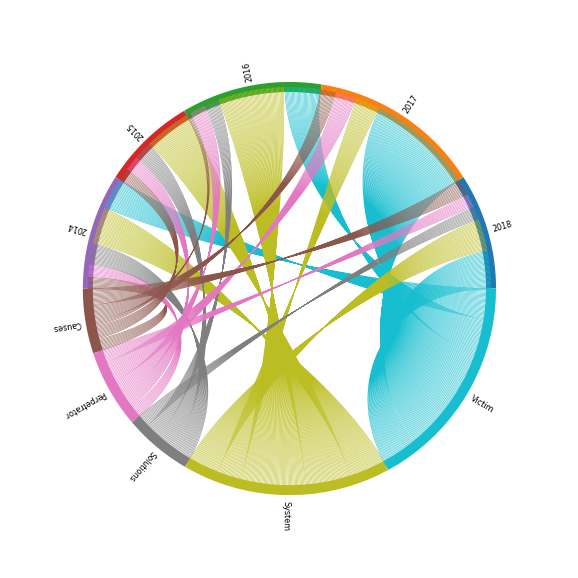

In [72]:
chord = hv.Chord((links, nodes))
chord.opts(
    opts.Chord(cmap='Category10', edge_cmap='Category10', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str(), node_size=0, fig_size=280)
)

# Power BI

In [96]:
with open('output/PB/chord.csv', 'w') as f:
    f.write('Source'+','+'Destination'+','+'Value'+'\n')
    for topic in topic_list:
        for year in range(2014, 2019):
            f.write(topic+',Year '+str(year)+','+str(int(contrib[(year, topic)]))+'\n')

# New Stacked Bar

In [168]:
for dfi in df:
    print(dfi['Num_Documents'].sum())

3402
15977
21256
20746
22384


In [183]:
counts = []
maxx = 22384
totals = {
    'System': 0,
    'Perpetrator': 0,
    'Solutions': 0,
    'Causes': 0,
    'Victim': 0
}
grand_total = 0

for dfi in df:
    count = {
        'System': 0,
        'Perpetrator': 0,
        'Solutions': 0,
        'Causes': 0,
        'Victim': 0
    }
    total = 0
    for _, row in dfi.iterrows():
        topic = mapping[row['Topic']]
        count[topic] = count.get(topic) + row['Num_Documents']
        total += row['Num_Documents']
        grand_total += row['Num_Documents']
        totals[topic] = totals.get(topic) + row['Num_Documents'] 
    count['Others'] = maxx - total
    counts.append(count)
        
grand_total

83765

In [185]:
percs = {}
for topic in topic_list:
    percs[topic] = totals[topic] / grand_total
percs

{'Victim': 0.1316062794723333,
 'System': 0.2560257864263117,
 'Perpetrator': 0.14595594818838417,
 'Solutions': 0.18083925267116338,
 'Causes': 0.28557273324180743}

In [190]:
traces = []

for i, topic in enumerate(['Causes','System','Perpetrator','Solutions','Victim','Others']):
    y = [counts[year-2014][topic] for year in range(2014, 2019)]
    traces.append(go.Bar(
        x=list(range(2014, 2019)),
        y=y,
        name=topic,
        showlegend=True,
        marker=dict(color=colors[i])
    ))
                
layout = go.Layout(
    barmode='stack',
    bargap=0,
    width=650,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~qjtjjt/0 or inside your plot.ly account where it is named 'stacked-bar'


In [188]:
data = []
for i, topic in enumerate(topic_list):
    data.append(go.Bar(
        orientation='h',
        y=['Perc'],
        x=[str(round(percs[topic]*100))+'%'],
        name=topic,
        showlegend=True,
        text=str(round(percs[topic]*100))+'%',
        textposition='inside',
        hoverinfo='none',
        marker=dict(color=colors[i])
    ))
    
data.append(go.Bar(
    orientation='h',
    y=['Perc'],
    x=['8%'],
    name='Others',
    showlegend=True,
    hoverinfo='none',
    marker=dict(color=greys[1])
))

layout = go.Layout(
    barmode='stack',
    width=650,
    height=250,
    legend=dict(orientation='h', traceorder='normal'),
    xaxis=dict(
        visible=False
    ),
    yaxis=dict(
        visible=False
    )
)

fig_h = go.Figure(data=data, layout=layout)
py.iplot(fig_h, filename='h-bar')

In [193]:
with open('output/PB/stack.csv', 'w') as f:
    f.write('Year,Topic,Count\n')
    for year in range(2014, 2019):
        for i, topic in enumerate(['Causes','System','Perpetrator','Solutions','Victim','Others']):
            f.write(str(year)+','+str(i+1)+'. '+topic+','+str(counts[year-2014][topic])+'\n')

In [195]:
with open('output/PB/counts.csv', 'w') as f:
    f.write('Topic,Count\n')
    for i, topic in enumerate(['Causes','System','Perpetrator','Solutions','Victim']):
        f.write(str(i+1)+'. '+topic+','+str(totals[topic])+'\n')